In [3]:
import scipy.linalg as la

In [5]:
import numpy as np
from sklearn.decomposition import PCA
X = np.random.randn(10,10)
pca = PCA()
pca.fit(X)

PCA()

In [10]:
U = pca.components_

In [12]:
Q, R = la.schur(U)

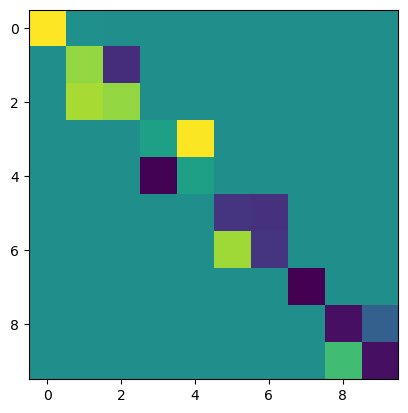

In [16]:
import matplotlib.pyplot as plt
plt.imshow(Q)

In [48]:
import numpy as np

def sliding_window(seq_lens, window_size):
  cumu_counter = 0
  start_idx = 0
  overlap_idx = 0  
  overlap_size = window_size//2

  for idx, len_x in enumerate(seq_lens):
    print(f"[{idx:02d}]: cumu: {cumu_counter}, sidx: {start_idx}, oidx: {overlap_idx}")    
    if cumu_counter < overlap_size and \
        cumu_counter+len_x >= overlap_size:
      overlap_idx = idx
    if cumu_counter+len_x >= window_size:
      yield (start_idx, idx)
      start_idx = overlap_idx
      overlap_idx = idx
      cumu_counter = seq_lens[start_idx:idx].sum()
    cumu_counter += len_x
  
  print(f"[end] cumu: {cumu_counter}, sidx: {start_idx}, oidx: {overlap_idx}")  
  yield start_idx, len(seq_lens)

In [51]:
# make testcase for sliding_window
# input should be transformed to np.arry
seq_lens = np.array([3, 4, 3, 2, 3, 4])
for s, e in sliding_window(seq_lens, 8):
    print(f"{s}, {e}, {sum(seq_lens[s:e])}")


[00]: cumu: 0, sidx: 0, oidx: 0
[01]: cumu: 3, sidx: 0, oidx: 0
[02]: cumu: 7, sidx: 0, oidx: 1
0, 2, 7
[03]: cumu: 7, sidx: 1, oidx: 2
1, 3, 7
[04]: cumu: 5, sidx: 2, oidx: 3
2, 4, 5
[05]: cumu: 5, sidx: 3, oidx: 4
3, 5, 5
[end] cumu: 7, sidx: 4, oidx: 5
4, 6, 7
